#### A Technical Report Presented to the Faculty of the College of Computer Studies
#### De La Salle University - Manila

**by:**
  - Chavez, Gabriel
  - Alfonso Miguel M. Cuevas
  - Silverio, Gwyneth Patricia Alysson

**Professor:**
  - Earl Abraham



# Introduction

Stroke is one of the deadliest diseases in the world (Pietrangelo, 2019). It is so deadly, that an article by the World Health Organization shows that stroke was the second leading cause of death in the world back in 2020. Despite being a preventable and treatable decease, it is still a primary cause of mortality and substantial disability in adults especially in the United States (CDC, 2022). Stroke occurs when a blood vessel that supplies the brain with oxygen and nutrients become blocked by a clot or ruptures. When this blocking of the blood flow to the brain happens, a portion of the brain that requires the blocked blood and oxygen dies (About stroke, n.d). 

Stroke is a sudden attack -- it can happen in as little as 15 minutes. Stroke occurs so suddenly that ten million individuals around the world die from them or become disabled by them every year (Tuan, 2021). It is such a sudden and deadly disease that ischemic stroke patients lose two million brain cells every minute until the blood resumes the flow into the brain. This is the reason why taking a predictive approach in preventing stroke is necessary, if we had a tool that could predict stroke, according to a Harvard Medical Study (Stroke: Every minute counts 2013), when the treatment was accelerated by 15 minutes there is a:

- 4% lower risk of in-hospital death
- 4% better odds of walking independently after leaving the hospital
- 3% better odds of being sent home instead of to an institution
- 4% lower odds of a brain hemorrhage.

The development of machine learning and artificial intelligence with good data is essential to produce a model that can predict stroke accurately. The aim of writing this technical report is to create a prediction system with the use of machine learning and data processing. The system will take into consideration the different features such as a subject's body mass index, gender, age, and other information that could affect the chances of said subject having stroke. This prediction system can help those who are likely to have stroke by perhaps giving them a chance to have a change of lifestyle after seeing the prediction made by the system. It can also lead them to seek professional help earlier which can lower the risks that you get from this deadly disease. 

# Research Questions

- 1. What is the relationship between history of heart disease and strokes?
- 2. What is the relationship between smoking and strokes?
- 3. What is the relationship between age and strokes?
- 4. What is the likelihood of being able to predict a stroke given several factors?

# Stroke Prediction Dataset

This dataset was taken from Kaggle. 
It was uploaded by a user named FEDESORIANO, and it was last updated a year ago. 

Link to the dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?fbclid=IwAR2TTi2gR422LMtzEEE9pIJ81jdQTc-_N4MRauqNdMfnumDUeZgO2P-Viss

This dataset comprises details on predicting if the a patient would get likely get a stroke based on specifications such as age, gender, various diseases and smoking status. It contains 11 contains 11 clinical features and a total of 5110 observations which is broken down in the segment below.


**Features:**
  - id: A unique Identifier for each observation
  - gender: "Male", "Female" or "Other"
  - age: Age of the patient
  - ever_married: "No" or "Yes"
  - work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  - Residence_type: "Rural" or "Urban"

**Labels:**
  - hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  - heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  - avg_glucose_level: average glucose level in blood
  - bmi: body mass index
  - smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  - stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Class Distribution**

1. Gender: 
  - 59% Female
  - 41% Male


2. Age: 
  - 0.08 - 8.27 = 434
  - 8.27 - 16.46 = 362
  - 16.46 - 24.66 = 440
  - 24.66 - 32.85 = 484
  - 32.85 - 41.04 = 597
  - 41.04 - 49.23 = 583
  - 49.23 - 57.42 = 686
  - 57.42 - 65.62 = 559
  - 65.62 - 73.81 = 407
  - 73.81 - 82.00 = 558
		
        
3. Hypertension: 
  - 0 = 4612
  - 1 = 498
           
           
4. Heart Disease: 
  - 0 = 4834
  - 1 = 276
               
               
5. Ever Married: 
  - false = 34.4%
  - true = 65.6%
              
              
6. Work Type:  
  - Private = 57%
  - Self Employed = 16%
  - Other = 27%
              
              
7. Residence Type: 
  - Urban = 51%
  - Rural  = 49%
           
           
8. Average Glucose Level: 
  - 55.12 - 76.78 = 1250
  - 76.78 - 98.44 = 1790
  - 98.44 - 120.11 = 956
  - 120.11 - 141.77 = 310
  - 141.77 - 163.43 = 154
  - 163.42 - 185. 09 = 91
  - 185.09 - 206.75 = 209
  - 206.75 - 228.42 = 217
  - 228.42 - 250.08 = 108
  - 250.08 - 271.74 = 25
              
              
9. BMI: 
  - N/A = 4%
  - 28.7 = 1%
  - Others = 95%
        
        
10. Smoking Status: 
  - Never Smoked  = 37%
  - Unknown  = 30%
  - Others = 33%
        
        
11. Stroke: 
  - 0 = 4861
  - 1 = 249

# Methodology

## Import

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(1)
%load_ext autoreload
%autoreload 2

## Data analysis

#### Load csv file into a pandas dataframe

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Shape of the dataset (number of rows and columns)

In [3]:
df.shape

(5110, 12)

- The dataset contains 5110 attributes and 12 columns.

#### Overall information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Descriptive statistics of the dataset

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data preprocessing/cleaning

#### Check for any null/missing values in the dataset

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- There is a total of 201 null/missing values in the BMI column.

#### Dropping the rows where there are null/missing values in the dataset

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


- Since only less than 5% of rows in the dataset contains null/missing values, it is okay to drop them.

#### Checking the new shape of the dataset

In [8]:
df.shape

(4909, 12)

#### Encoding categorical values
1. gender
    * 0: Male
    * 1: Female
    * 2: Other
    
    
2. ever_married
    * 0: No
    * 1: Yes


3. work_type
    * children: 0
    * Govt_job: 1
    * Never_worked: 2
    * Private: 3
    * Self-employed: 4


4. resident_type
    * Rural: 0
    * Urban: 1


5. smoking_status
    * formerly smoked: 0
    * never smoked: 1
    * smokes: 2
    * Unknown: 3

In [9]:
df['gender'].replace(to_replace=['Male', 'Female', 'Other'], value=[0, 1, 2], inplace=True)
df['ever_married'].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df['work_type'].replace(to_replace=['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed'], value=[0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(to_replace=['Rural', 'Urban'], value=[0, 1], inplace=True)
df['smoking_status'].replace(to_replace=['formerly smoked', 'never smoked', 'smokes', 'Unknown'], value=[0, 1, 2, 3], inplace=True)


C:\Users\alyss\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### Check if the values have been replaced

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,0,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,3,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,0,0,103.08,18.6,3,0
5106,44873,1,81.0,0,0,1,4,1,125.20,40.0,1,0
5107,19723,1,35.0,0,0,1,4,0,82.99,30.6,1,0
5108,37544,0,51.0,0,0,1,3,0,166.29,25.6,0,0


- Categorical values must be converted to numerical values before giving the data to the model.

## Data visualization

### Stroke / Age

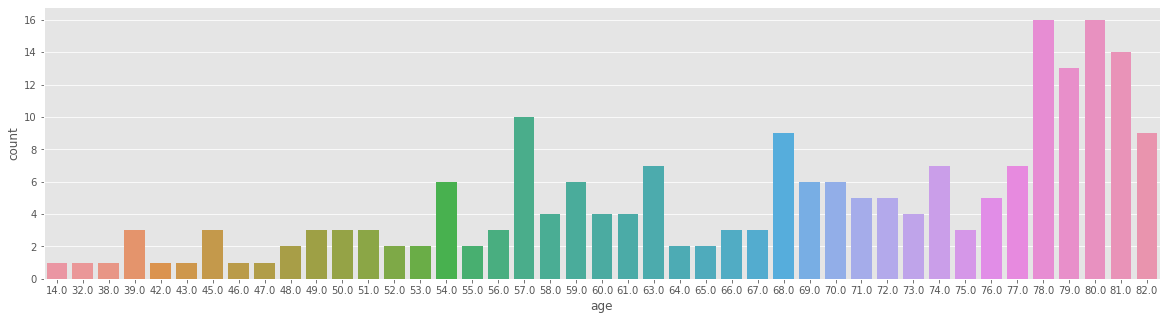

In [11]:
plt.figure(figsize=(20,5))
str=df.loc[df['stroke']==1]
sns.countplot(data=str, x='age');

- Strokes occur more frequently in older ages.

### Stroke / Gender

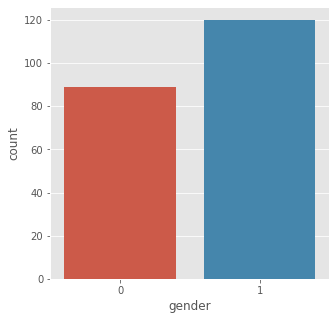

In [12]:
plt.figure(figsize=(5,5))
str=df.loc[df['stroke']==1]
sns.countplot(data=str, x='gender');

- Strokes occurred more frequently in females compared to males.

### Stroke / Heart Disease

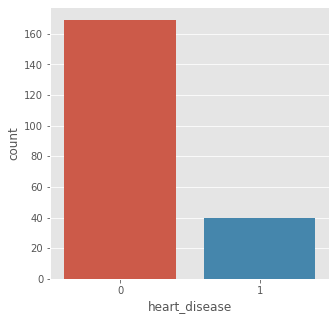

In [13]:
plt.figure(figsize=(5,5))
str=df.loc[df['stroke']==1]
sns.countplot(data=str, x='heart_disease');

- Patients without history of heart diseases have gotten more strokes.

### Stroke / Hypertension

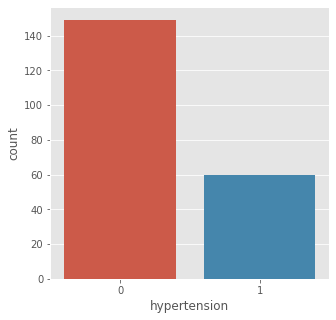

In [14]:
plt.figure(figsize=(5,5))
str=df.loc[df['stroke']==1]
sns.countplot(data=str, x='hypertension');

- Patients without hypertension have gotten more strokes.

### Stroke / Smoking Status

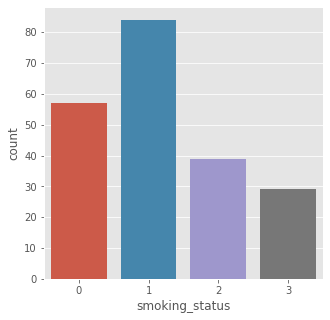

In [15]:
plt.figure(figsize=(5,5))
str=df.loc[df['stroke']==1]
sns.countplot(data=str, x='smoking_status');

- Those who have formerly smoked and are currently smokers have suffered more strokes compared to those who have never smoked.

## Classification model: Logistic Regression

- The Logistic Regression model was chosen in order to conduct analysis to our dependent variables. It was used to analyze the relationship between dependent variables such as the relationship of having a heart disease, smoking, etc. with a stroke occuring.

#### Extract the feature columns for X, and the label column for y

In [16]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

print(X.shape)
print(y.shape)

(4909, 11)
(4909,)


#### Split the dataset into train and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#### Building a LogisticRegression model

In [18]:
logistic_regression = LogisticRegression()

#### Run predictions on the train set, get the accuracy

In [19]:
predictions_train = logistic_regression.fit(X_train, y_train).predict(X_train)
print("Accuracy: ", logistic_regression.score(X_train, y_train)*100)

Accuracy:  95.2322738386308


#### Run predictions on the test set, get the accuracy of model

In [20]:
predictions = logistic_regression.predict(X_test)
lr_accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy: ", lr_accuracy*100)

Accuracy:  95.9266802443992


- The Logistic Regression model has an accuracy of 95.93 percent.

In [21]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2358
           1       0.29      0.02      0.04        97

    accuracy                           0.96      2455
   macro avg       0.62      0.51      0.51      2455
weighted avg       0.93      0.96      0.94      2455

[[2353    5]
 [  95    2]]


- Classification report: As seen from the precision, recall, and most importantly, the f1-score, the model is more accurate in predicting negative cases rather than positive cases.
- Confusion matrix: 2353 negative cases were predicted correctly, with only 95 false negatives. 5 positive cases were predicted correctly, with only 2 false positives.

In [22]:
logistic_regression.coef_

array([[-1.25615981e-05, -5.29462736e-03,  4.36073906e-02,
         2.46536999e-03,  1.99031876e-03, -8.24276923e-04,
        -1.18329163e-02, -3.70505654e-03,  3.31356553e-03,
        -1.79239378e-01, -2.16788097e-02]])

# Conclusion

After training the model, a classification report and a confusion matrix was generated, from the two, it is seen that the model is more accurate in predicting negative cases than positive cases. Further more, when looking into the model's coefficients, the model assigned the most weight on hypertension and heart disease. Though the dataset is not standardized, both hypertension and heart disease have the same amount of possible values (0 and 1), thus we can conclude that among these two features, hypertension is a more important feature than heart disease. We can also conclude that a person having hypertension or heart disease can increase that person's risk of having stroke.

- What is the relationship between history of heart disease and strokes?

It can increase the risk of a stroke occurring.
    
- What is the relationship between smoking and strokes?

Those who have formerly smoked or are currently smoking have suffered more strokes compared to non-smokers.

- What is the relationship between age and strokes?

Strokes occur more frequently in older ages.

- What is the likelihood of being able to predict a stroke given several factors?

Using a logistic regression model, there is a 95.92 percent chance of predicting a stroke.

# Recommendations

- It is recommended to use another set or upsample the current dataset, as it is heavily unbalanced. Most of the rows contain patients who have not had a stroke.
- Creating other classification models to possibly get a higher accuracy in predicting strokes.
- Standardize the dataset to more easily determine feature importance.

## References

About stroke. www.stroke.org. (n.d.). Retrieved July 6, 2022, from https://www.stroke.org/en/about-stroke 

Centers for Disease Control and Prevention. (2022, June 14). Stroke. Centers for Disease Control and Prevention. Retrieved July 6, 2022, from https://www.cdc.gov/stroke/index.htm 

Pietrangelo, A. (2019, July 10). The top 10 deadliest diseases in the world. Healthline. Retrieved July 6, 2022, from https://www.healthline.com/health/top-10-deadliest-diseases 

Tuan, J. (2021, May 12). How AI is able to predict and detect a stroke. ReferralMD. Retrieved July 6, 2022, from https://getreferralmd.com/2019/10/how-ai-is-able-to-predict-and-detect-a-stroke/

Singh, P. K. (2020, October 29). World stroke day. World Health Organization. Retrieved July 6, 2022, from https://www.who.int/southeastasia/news/detail/29-10-2020-world-stroke-day-ms

Stroke: Every minute counts. Harvard Health. (2013, August 1). Retrieved July 6, 2022, from https://www.health.harvard.edu/heart-health/stroke-every-minute-counts 